## 七月在线机器学习集训营八期第三周(数据可视化)考试
#### 考试说明:
- 起止时间：请同学在2019年05月24日至05月27日期间完成，最晚提交时间下周一（05月27日12：00时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试提交方式：请同学<font color=red><b>拷贝</b></font>该试卷后，将文件更名为同学姓名拼音-exam3（例如wangwei-exam3）后，移动至/0.Teacher/Exam/3/目录下进行作答。
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分处不用填写

- 同学姓名:王迪
- 批改人：   
- 最终得分:

<center><h1>####答卷开始####</h1></center>
<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号

## 问答题(共5题，每题8分，共计40分)

### 1.随机从某超市抽取10个顾客，得到他们购物所花费的金额（单位：元）

- 数据：388，24，152，63.2，224.6，26，69，70，138，213

- 请问我们可以用哪些统计量，分析该组数据？

In [2]:
consume = [388,24,152,63.2,224.6,26,69,70,138,213]
# consume.sort()
ss = pd.Series(consume)
ss.describe()

count     10.00000
mean     136.78000
std      113.68852
min       24.00000
25%       64.65000
50%      104.00000
75%      197.75000
max      388.00000
dtype: float64

### 2.（接上题）试从可视化的角度分别解读这些统计量对分布的影响？

(-0.5, 9.5, 5.800000000000001, 406.2)

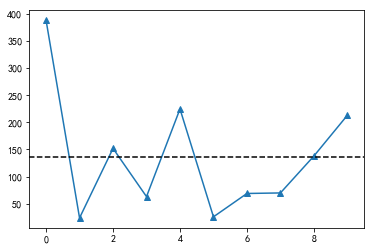

In [3]:
ss.plot(kind="line", marker='^')
plt.xlim(-0.5, 9.5)
plt.plot(range(-1, 11), [ss.mean()]*12, linestyle='dashed',color="black")
plt.axis()

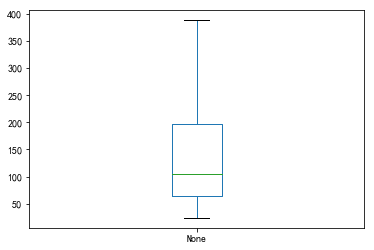

In [4]:
ss.plot(kind="box")

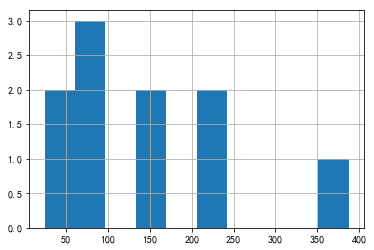

In [5]:
ss.hist()

### 3.下表是2006年北京上海和天津，按收入法计算的地区生产总值（按当年价格计算）数据。

|地  区|劳动者报酬|生产税净额|固定资产折旧|营业盈余|
|:---|:---|:---|:---|:---|
|北京|3496.57|1161.55|1251.09|1961.07|
|天津|1383.36	|775.09|595.09|1605.61|			
|上海|3756.56|1623.36|1730.51|3255.94|	

- 请给出至少三种<b>适用</b>于描述上述数据所用的可视化图形？并简要说明这些方法的特点和用途。
 				



In [6]:
data = [{'地区': '北京',
  '劳动者报酬': 3496.57,
  '生产税净额': 1161.55,
  '固定资产折旧': 1251.09,
  '营业盈余': 1961.07},
 {'地区': '天津',
  '劳动者报酬': 1383.36,
  '生产税净额': 775.09,
  '固定资产折旧': 595.09,
  '营业盈余': 1605.61},
 {'地区': '上海',
  '劳动者报酬': 3756.56,
  '生产税净额': 1623.36,
  '固定资产折旧': 1730.51,
  '营业盈余': 3255.94}]
df = pd.DataFrame(data)
df.set_index(["地区"], inplace=True)
df

,劳动者报酬,固定资产折旧,生产税净额,营业盈余
地区,,,,
北京,3496.57,1251.09,1161.55,1961.07
天津,1383.36,595.09,775.09,1605.61
上海,3756.56,1730.51,1623.36,3255.94


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

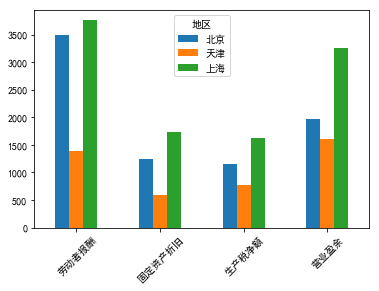

In [7]:
df.T.plot(kind="bar")
plt.xticks(rotation=45)

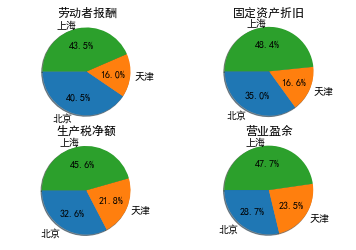

In [8]:
for i, col in enumerate(df.columns):
    ax = plt.subplot(2, 2, i+1)
    ax.pie(df[col], autopct='%1.1f%%', shadow=True, startangle=180, labels=df.index)
    plt.title(col)
    ax.axis("equal")
    

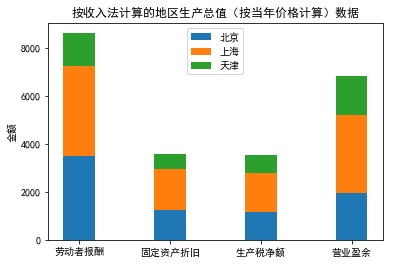

In [9]:
def stackbarplot(df, labels):
    N = len(labels)
    total = df['北京']+df['上海']+df['天津']
    a1 = df['北京']
    a2 = df['上海']
    a3 = df['天津']

    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, a1, width)
    p2 = plt.bar(ind, a2, width, bottom=a1)
    p3 = plt.bar(ind, a3, width, bottom=a1+a2)

    plt.ylabel('金额')
    plt.title('按收入法计算的地区生产总值（按当年价格计算）数据')
    plt.xticks(ind, labels)
    # plt.yticks(np.arange(0, 81, 10))
    plt.legend((p1[0], p2[0], p3[0]), ('北京', '上海','天津'), loc="upper center")
    

stackbarplot(df.T, df.columns)

In [10]:
df.T

地区,北京,天津,上海
劳动者报酬,3496.57,1383.36,3756.56
固定资产折旧,1251.09,595.09,1730.51
生产税净额,1161.55,775.09,1623.36
营业盈余,1961.07,1605.61,3255.94


### 4.试述有哪些方法可以判断一组数据是否服从正态分布？

       value
0  10.223979
1  10.744591
2   9.665731
3  11.389172
4   7.703905
均值为：9.98，标准差为：0.96
------
        value
688  6.953393
450  7.130903
226  7.225938
758  7.298413
246  7.328985
----------
    index     value
0    688  6.953393
1    450  7.130903
2    226  7.225938
3    758  7.298413
4    246  7.328985
   index     value       p         q
0    688  6.953393 -0.0005 -3.168755
1    450  7.130903  0.0005 -2.982953
2    226  7.225938  0.0015 -2.883479
3    758  7.298413  0.0025 -2.807619
4    246  7.328985  0.0035 -2.775619
------
四分之一位数为：9.34，四分之三位数为：10.61
------


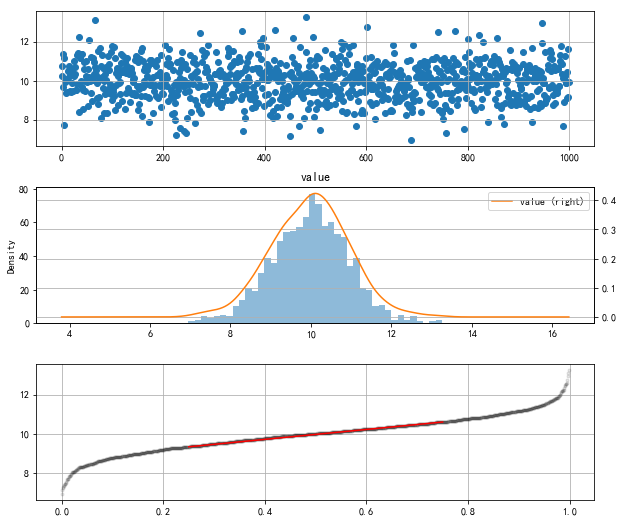

In [11]:
np.random.seed(54321)
s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
print(s.head())
# 创建随机数据

mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f，标准差为：%.2f' % (mean,std))
print('------')
#  计算均值，标准差

s.sort_values(by = 'value', inplace = True)  # 重新排序
print(s.head())
s_r = s.reset_index(drop = False)  # 重新排序后，更新index
print("----------\n", s_r.head())
s_r['p'] = (s_r.index - 0.5) / len(s_r)  
s_r['q'] = (s_r['value'] - mean) / std
print(s_r.head())
print('------')
# 计算百分位数 p(i)
# 计算q值

st = s['value'].describe()
x1 ,y1 = 0.25, st['25%']
x2 ,y2 = 0.75, st['75%']
print('四分之一位数为：%.2f，四分之三位数为：%.2f' % (y1,y2))
print('------')
# 计算四分之一位数、四分之三位数

fig = plt.figure(figsize = (10,9))
ax1 = fig.add_subplot(3,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()
# # 绘制数据分布图

ax2 = fig.add_subplot(3,1,2)  # 创建子图2
s.hist(bins=40,alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()
# # 绘制直方图

ax3 = fig.add_subplot(3,1,3)  # 创建子图3
ax3.plot(s_r['p'],s_r['value'],'k.',alpha = 0.1)
ax3.plot([x1,x2],[y1,y2],'-r')
plt.grid()
# # 绘制QQ图，直线为四分之一位数、四分之三位数的连线，基本符合正态分布

### 5.试述您对置信水平和置信区间的理解？

## 实战题(共四大题，20小题，每小题3分，共60分)
#### 注意:每小题绘图均要求使用seaborn库进行,绘图下方均要求给出同学的分析或见解，只有图没有分析不给分

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

### 1.航班乘客变化分析 (10分)

- 载入相应绘图库及航班乘客数据（flights）

In [13]:
# flights_df=sns.load_dataset("../data/flights")
# flights_df.head()
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


- 分析年度乘客总量变化情况（折线图）

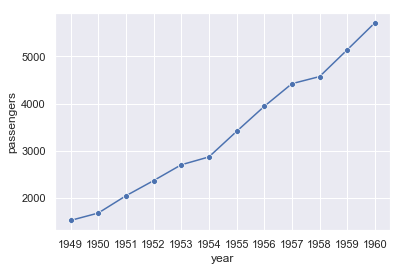

In [14]:
# 按年度聚合，横轴年度，纵轴乘客数量
flights_by_year = flights_df.groupby(["year"])["passengers"].sum().reset_index()
sns.lineplot(x="year", y="passengers", data=flights_by_year, marker='o')
plt.xticks(flights_by_year.year)
plt.show()

- 分析乘客在一年中各月份的分布（柱状图）

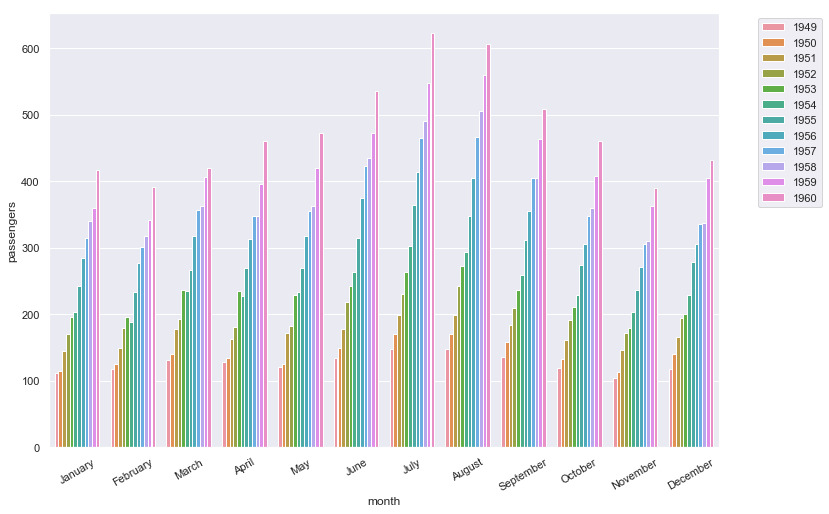

In [15]:
# 注意设置hue，颜色控制的变量为年份，绘制柱状图
plt.figure(figsize=(12, 8))
flights_by_month = flights_df.groupby(["month"])["passengers"].sum().reset_index()
sns.barplot(data=flights_df, x="month", y="passengers", hue="year") 
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### 2.鸢尾花花型尺寸分析

- 载入iris数据集

In [16]:
iris_df=sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- 萼片（sepal）和花瓣（petal）的大小关系（散点图）

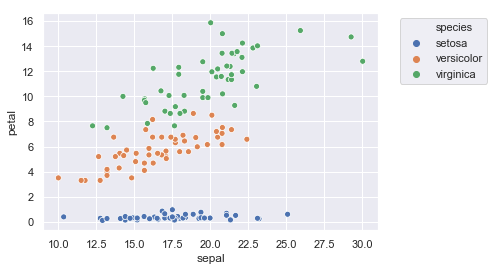

In [17]:
# sepal 和petal 分别计算面积，hue按照species分类，绘制散点图
iris_df["sepal"] = (iris_df.sepal_length * iris_df.sepal_width).round(decimals=2)
iris_df["petal"] = iris_df.petal_length * iris_df.petal_width

sns.scatterplot(data=iris_df, x='sepal', y='petal', hue='species')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

- 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

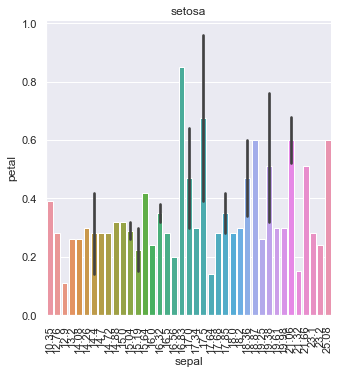

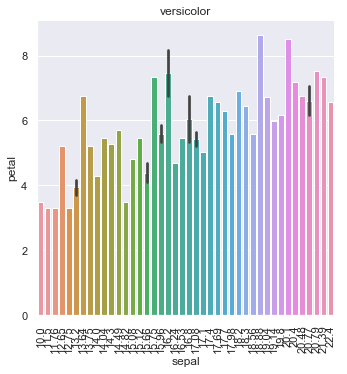

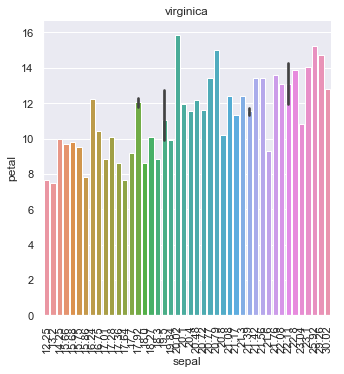

In [18]:
#  catplot 可以绘制category类型图，kind可以有很多种选择
def draw(data):
    species = data['species'].unique() 
    for spec in species:
        data_species = data.loc[data['species'] == spec, :]
        sns.catplot(kind="bar", x="sepal", y="petal", data=data_species) #柱状图
#         sns.catplot(x="sepal", y="petal", kind='box', data=data_species)  #箱式图
        plt.xticks(rotation=90)
        plt.title(spec)
        plt.show()

draw(iris_df)

- 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

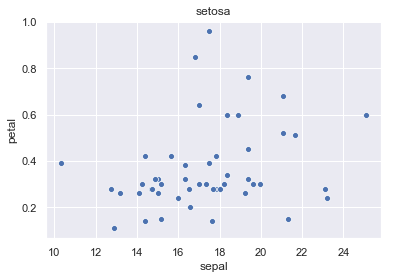

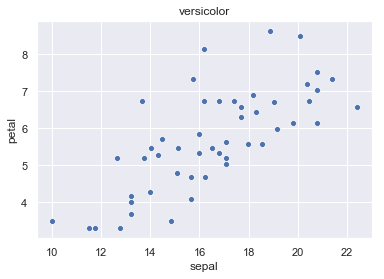

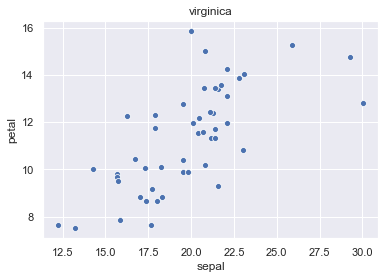

In [19]:
#  绘制散点图即可
def draw(data):
    species = data['species'].unique() 
    for spec in species:
        data_species = data.loc[data['species'] == spec, :]
        sns.scatterplot(x="sepal", y="petal", data=data_species)  #散点图
#         plt.xticks(rotation=90)
        plt.title(spec)
        plt.show()

draw(iris_df)

### 3.餐厅小费情况分析
* 载入tips数据集

In [20]:
tips_df=sns.load_dataset("../data/tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 小费和总消费之间的关系（散点图）

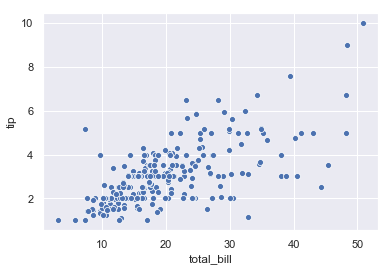

In [21]:
# 绘制散点图即可
sns.scatterplot(data=tips_df, x="total_bill", y="tip")
plt.show()

- 男性顾客和女性顾客，谁更慷慨（分类箱式图）

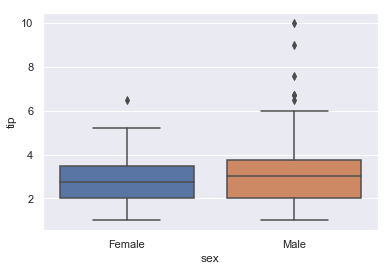

In [22]:
# 绘制箱式图即可,sex与tip
sns.boxplot(data=tips_df, x="sex", y="tip")
plt.show()

- 抽烟与否是否会对小费金额产生影响（分类箱式图）

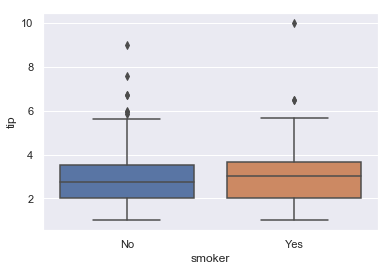

In [23]:
# 绘制箱式图即可,smoker与tip
sns.boxplot(data=tips_df, x="smoker", y="tip")
plt.show()

- 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）

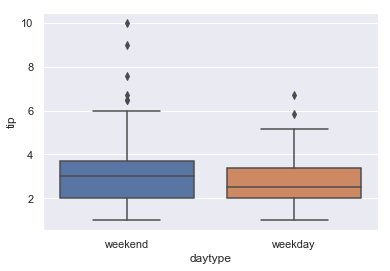

In [24]:
# "Sat", "Sun"是周末，其余为工作日，绘制箱式图即可,week与tip
tips_df["daytype"] = tips_df["day"].apply(lambda x: "weekend" if x in {"Sat", "Sun"} else "weekday")
sns.boxplot(data=tips_df, x="daytype", y="tip")
plt.show()

- 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）

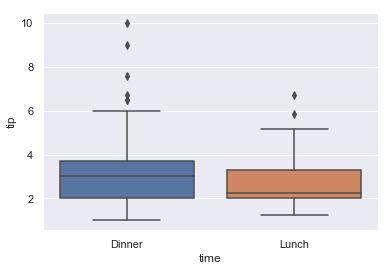

In [25]:
# 绘制箱式图即可,time与tip
sns.boxplot(data=tips_df, x="time", y="tip")
plt.show()

- 就餐人数是否会对慷慨度产生影响（分类箱式图）

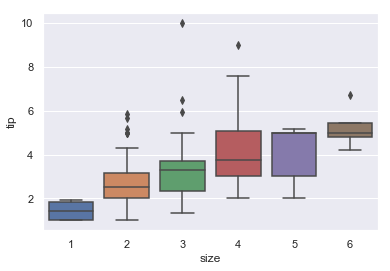

In [26]:
# 绘制箱式图即可,size与tip
sns.boxplot(data=tips_df, x="size", y="tip")
plt.show()

- 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

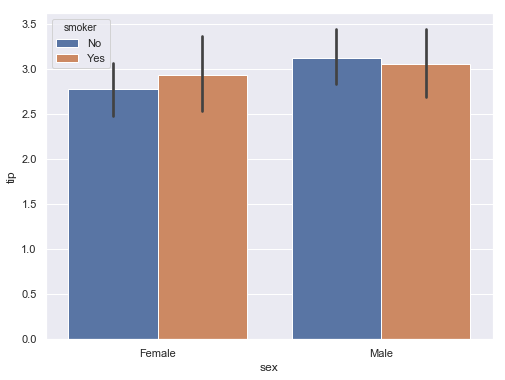

In [27]:
# 绘制分组柱状图即可,sex与tip,hue选择smoker
# labels=[]
# for gender in ['Female', 'Male']:
#     for isSmoker in ['No', 'Yes']:
#         labels.append(gender + ' ' + ('Non-' if isSmoker == 'No' else '') + 'Smoker')
plt.figure(figsize=(8, 6))
sns.barplot(data=tips_df, x="sex", y="tip", hue="smoker")
# plt.xticks(labels)
# plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

### 4.泰坦尼克号海难幸存状况分析

* 载入数据集

In [28]:
titanic_df=sns.load_dataset("titanic")
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）

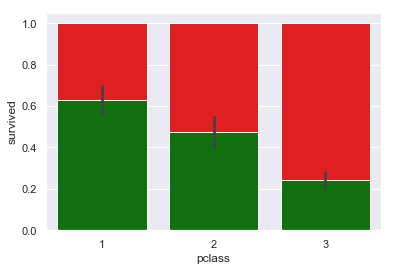

In [29]:
# 绘制堆积柱状图，注意颜色，pclass与survived
titanic_df["total"]=1
sns.barplot(x="pclass", y="total", data=titanic_df, color="red")
sns.barplot(x="pclass", y="survived", data=titanic_df, color="green")
plt.show()

* 不同性别的幸存比例（堆积柱状图）

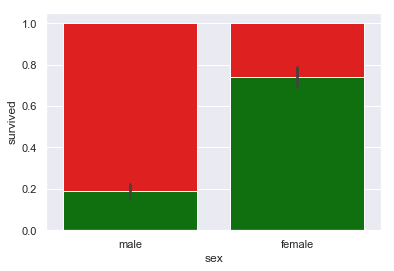

In [30]:
# 绘制堆积柱状图，注意颜色，sex与survived
titanic_df["total"]=1
sns.barplot(x="sex", y="total", data=titanic_df, color="red")
sns.barplot(x="sex", y="survived", data=titanic_df, color="green")
plt.show()

* 幸存和遇难乘客的票价分布（分类箱式图）

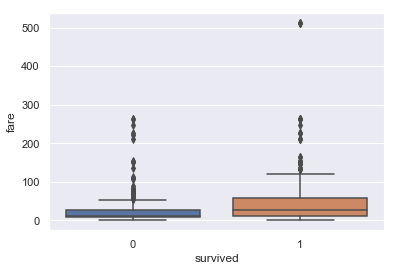

In [31]:
# 绘制分类箱式图，survived作为x，fare数量型作为y

sns.boxplot(x="survived", y="fare", data=titanic_df)
plt.show()

* 幸存和遇难乘客的年龄分布（分类箱式图）

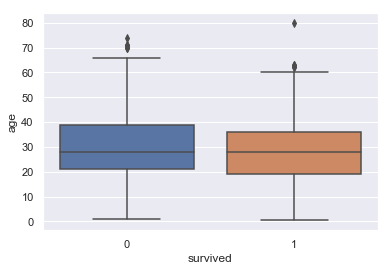

In [32]:
# 绘制分类箱式图，注意age有NAN，但被seaborn处理掉了。survived作为x，age数量型作为y

sns.boxplot(x="survived", y="age", data=titanic_df)
plt.show()

* 不同上船港口的乘客仓位等级分布（分组柱状图）

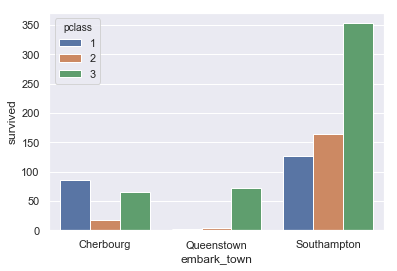

In [33]:
# 绘制分组柱状图，注意重新生成"embark_town", "pclass"的数据表，x,y,hue的选择
datax = titanic_df.groupby(["embark_town", "pclass"])["survived"].count().reset_index()
# datax.columns = ["embark_town", "pclass", ]
sns.barplot(data=datax, x="embark_town", y="survived", hue="pclass")
plt.show()

* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）

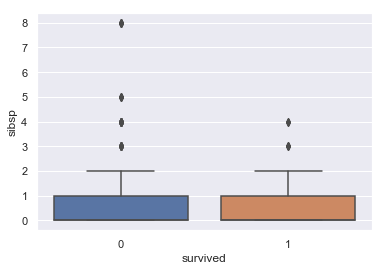

In [34]:
# 绘制分类箱式图，survived作为x，sibsp数量型作为y

sns.boxplot(x="survived", y="sibsp", data=titanic_df)
plt.show()

* 幸存和遇难乘客父母子女的数量分布（分类箱式图）

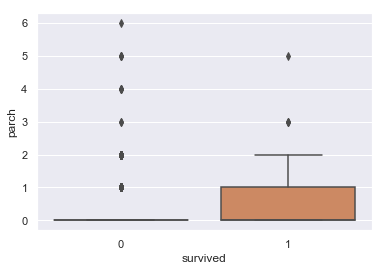

In [35]:
# 绘制分类箱式图，survived作为x，parch数量型作为y

sns.boxplot(x="survived", y="parch", data=titanic_df)
plt.show()

* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

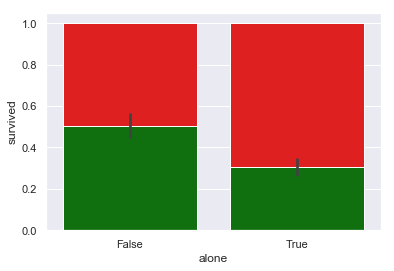

In [36]:
# 绘制堆积柱状图，注意颜色，alone与survived
titanic_df["total"] = 1
sns.barplot(x="alone", y="total", data=titanic_df, color="red")
sns.barplot(x="alone", y="survived", data=titanic_df, color="green")
plt.show()

***
<center><h1>####答卷结束####</h1></center>

### 本周课程意见反馈(非必答)
请同学围绕以下两点进行回答：
- 自身总结：您自己在本周课程的学习，收获，技能掌握等方面进行总结，包括自身在哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。
- 课程反馈：也可以就知识点，进度，难易度，教学方式，考试方式等等进行意见反馈，督促我们进行更有效的改进，为大家提供更优质的服务。
